# 2D Fourier transform


It is an extension of the 1D Fourier transform of signals defined in 2D:

$$F_{k_x, k_y} = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}{f(x,y)\cdot e^{-i2\pi({k_x x/M} + k_y y/N)}}$$


The inverse 2D Fourier transform becomes:

$$f_{x, y} = \frac{1}{MN}\sum_{k_x=0}^{M-1}\sum_{k_y=0}^{N-1}{F(k_x,k_y)\cdot e^{i2\pi({k_x x/M} + k_y y/N)}}$$


To find the characteristic temporal or spatial frequencies of 2D signals, we can use the 2D FFT function included in numpy (np.fft.fft2).


https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html


## Example 1: 

Given the matrix signal_2D, defined as:

\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}

Calculate its 2D DFT.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
signal_2D = np.array([[1, 2],[3, 4]])

print(signal_2D)

[[1 2]
 [3 4]]


In [4]:
fourier_2D = np.fft.fft2(signal_2D)

print(fourier_2D)

[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]


## Example 2: 

Given the matrix signal_2D, defined as:

$f(x, y) = sin(\alpha x)$

Calculate its 2D FFT.

In [5]:
def function_2D(x, y, alpha):
    return np.sin(alpha*x)

In [16]:
x = np.arange(0, 1, 0.001)

y = np.arange(0, 1, 0.001)

alpha = 10*np.pi

X, Y = np.meshgrid(x, y)

Z_f = function_2D(X, Y, alpha)

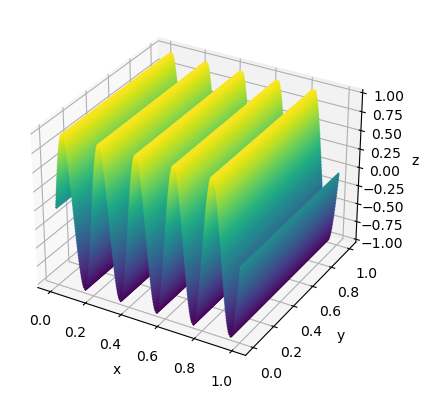

In [21]:
# Now we do some plotting:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

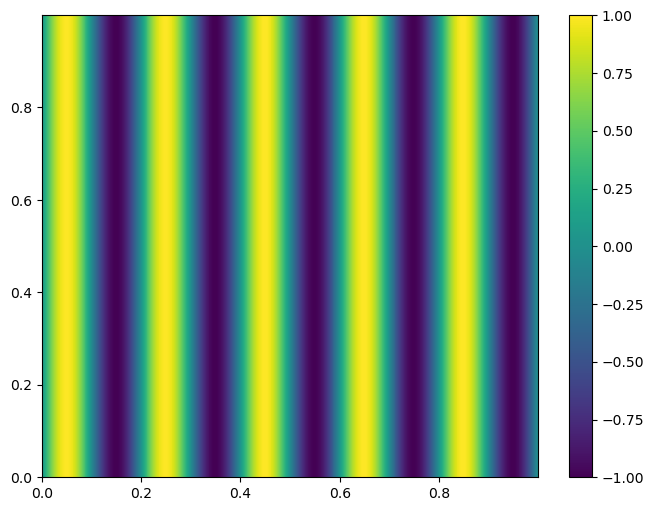

In [22]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(X, Y, Z_f, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()